In [7]:
import numpy as np
import pandas as pd
import Strategies 
import Strategy_Analysis_Tool 
from binance.client import Client
from matplotlib import pyplot as plt


In [8]:
# Get data
# symbol = "BTCUSDT"
# timeFrame = "1h"
# startDate = "2017-01-01"
# endDate = "2022-08-28"
# client = Client()
# bars = client.get_historical_klines(symbol=symbol,interval=timeFrame,start_str=startDate, end_str = endDate)
# df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
# df["date"]=pd.to_datetime(df["timestamp"],unit="ms").astype(str)
# df = df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
# df["open"] = pd.to_numeric(df["open"])
# df["high"] = pd.to_numeric(df["high"])
# df["low"] = pd.to_numeric(df["low"])
# df["close"] = pd.to_numeric(df["close"])
# df["volume"] = pd.to_numeric(df["volume"])

df = pd.read_csv("dataset.csv")
df

,open,high,low,close,volume,date
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-17 04:00:00
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 05:00:00
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 06:00:00
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 07:00:00
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 08:00:00
...,...,...,...,...,...,...
43953,20018.00,20040.40,19941.83,20007.99,4374.049180,2022-08-27 20:00:00
43954,20007.99,20029.84,19870.01,19873.06,2779.324280,2022-08-27 21:00:00
43955,19874.25,20103.57,19858.43,20020.08,8501.926530,2022-08-27 22:00:00
43956,20021.35,20087.65,19992.55,20037.60,5025.547650,2022-08-27 23:00:00


In [9]:
def plot_window(strategy, dataset, window_size = 2000, window_off = 10, profits = []):
    for i in range(0, len(dataset) - window_size, window_off):
        # plt.plot(dataset[i : i + window_size])
        data = dataset.loc[i : i + window_size]
        data.reset_index(inplace = True)

        profit, trading_count, buy_record, sell_record, MDD = strategy.back_test(data)
        print("Profit:", profit * 100, "Count:", trading_count)
        profits.append(profit * 100)
        # plt.cla()

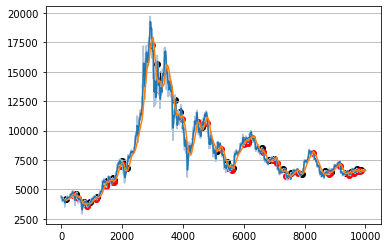

Profit: 367.0546240743274 Count: 73


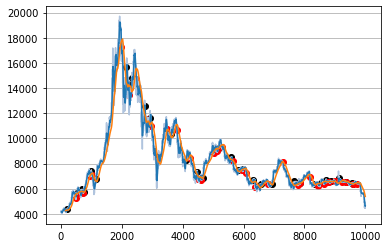

Profit: 476.30679421091696 Count: 74


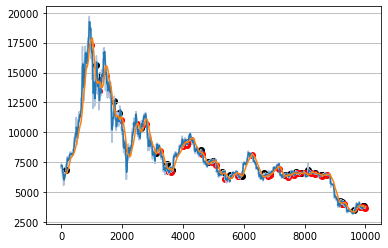

Profit: 394.965583238714 Count: 74


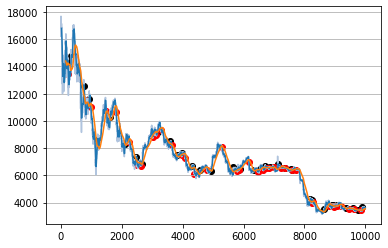

Profit: 76.76969023867571 Count: 82


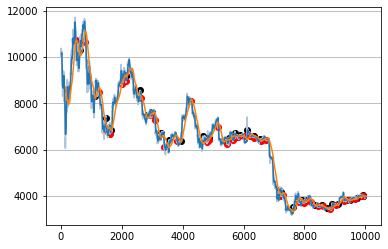

Profit: 82.64772281460546 Count: 88


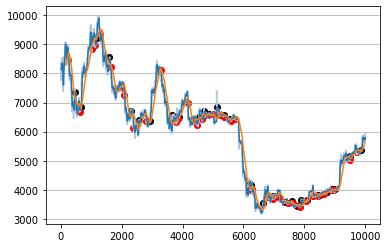

Profit: 41.95086333155423 Count: 90


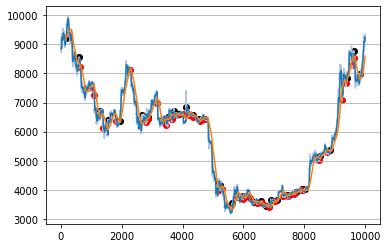

Profit: 48.64666206359102 Count: 89


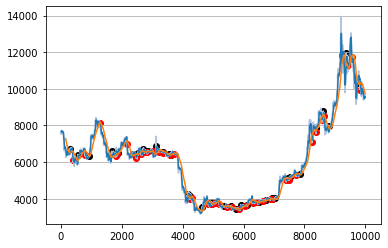

Profit: 58.28508621211509 Count: 90


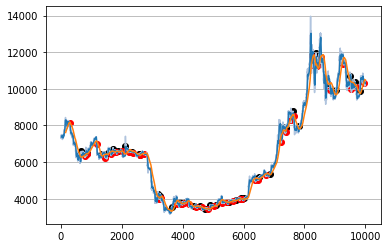

Profit: 51.55159029754422 Count: 93


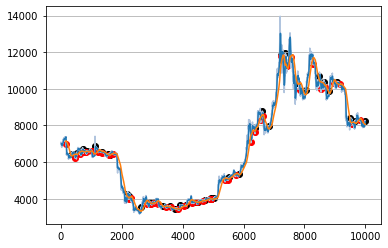

Profit: 42.348379078579526 Count: 94


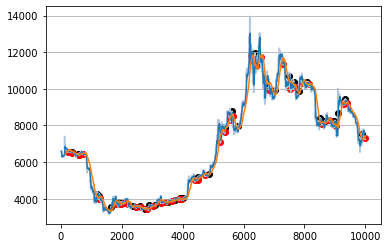

Profit: 73.36823476383879 Count: 91


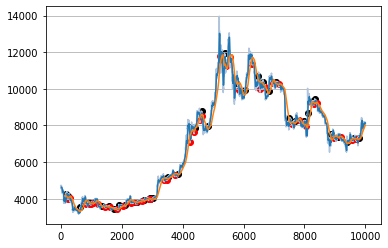

Profit: 46.621375317656586 Count: 91


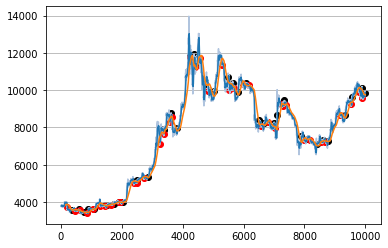

Profit: 70.09135128311186 Count: 86


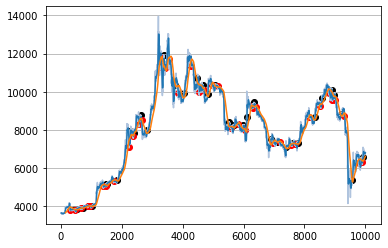

Profit: 189.455255604273 Count: 84


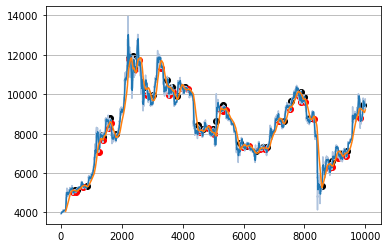

Profit: 167.40542836880368 Count: 76


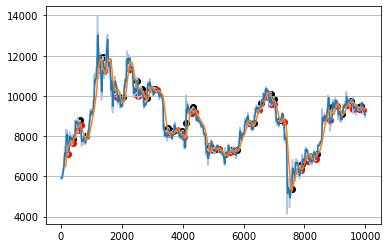

Profit: 97.97277969979302 Count: 81


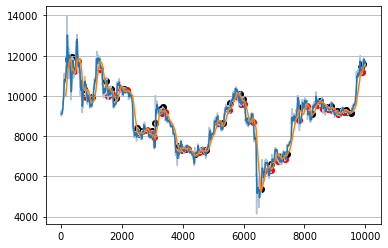

Profit: 58.56197085354867 Count: 86


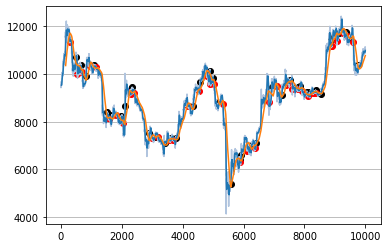

Profit: 61.65877065247578 Count: 84


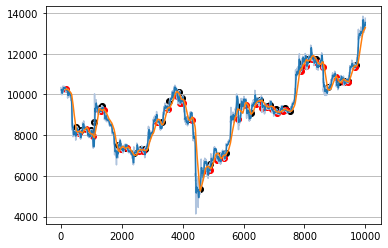

Profit: 106.86067635402632 Count: 84


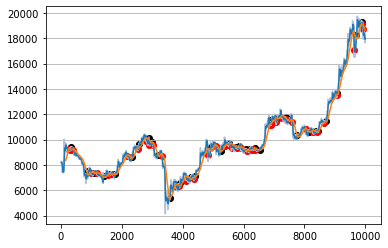

Profit: 124.65034517868989 Count: 85


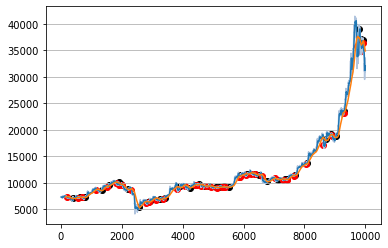

Profit: 190.54248336596885 Count: 87


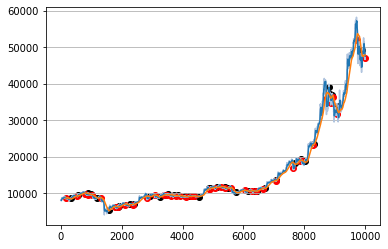

Profit: 212.46545686083675 Count: 87


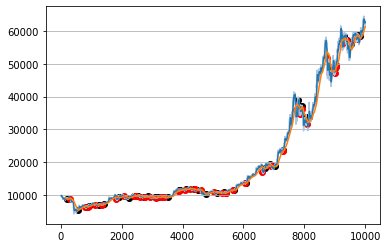

Profit: 226.0441766926324 Count: 93


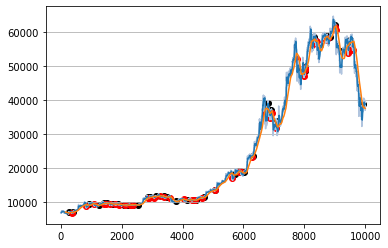

Profit: 146.9119466824368 Count: 95


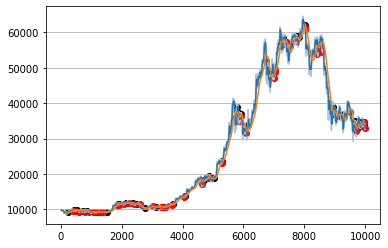

Profit: 72.82322853930043 Count: 104


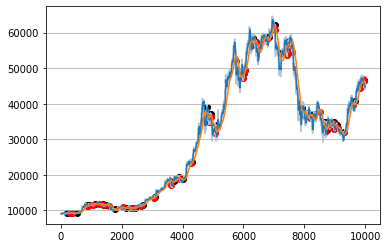

Profit: 145.53246986196297 Count: 102


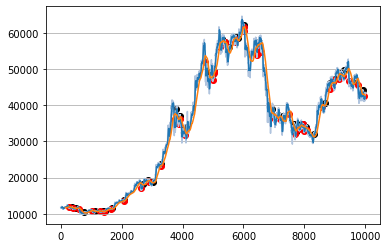

Profit: 88.16574794367365 Count: 99


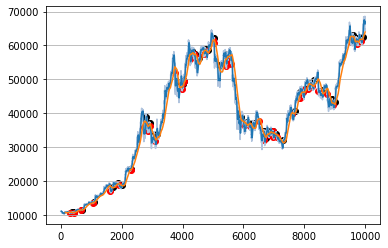

Profit: 106.61512392391546 Count: 102


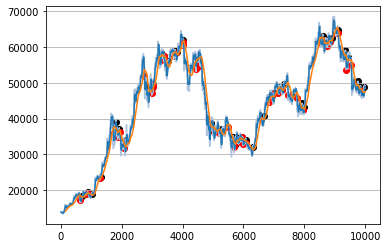

Profit: 13.370454218136546 Count: 106


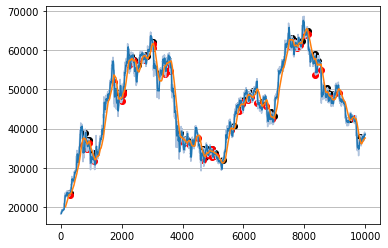

Profit: 30.846858558650503 Count: 102


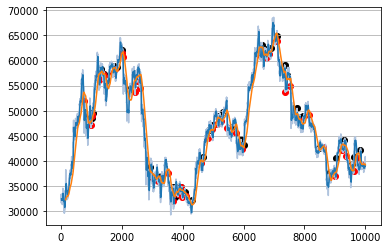

Profit: -41.69386961856471 Count: 101


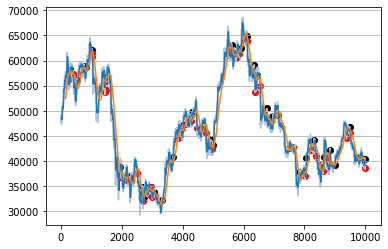

Profit: -39.96537489011956 Count: 101


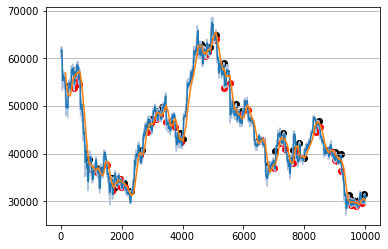

Profit: -68.77064597407248 Count: 111


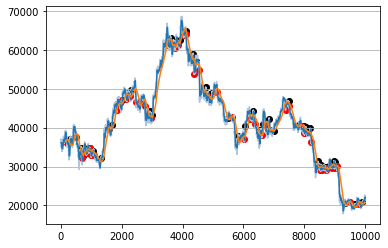

Profit: -58.66458015546249 Count: 110


In [10]:
# SMA strategy -- best Expected Return
sma_parameters_E = {
    "name":"SMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.1,                                     ## float
    "long_period": 156,                               ## long period of SMA curve
    "short_period": 21,                               ## short period of SMA curve
    "trading_logistic":"both",                       ## "long", "short", "both"
    "trading_unit": "all_in"                      ## "all_in", "same_unit" or "same_money"
}
sma_E = Strategies.SMA(sma_parameters_E)
profits = []
plot_window(strategy=sma_E, dataset = df, window_size = 10000, window_off = 1000, profits = profits)

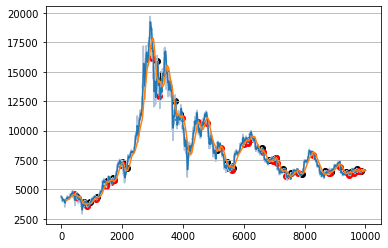

Profit: 236.938713648616 Count: 74


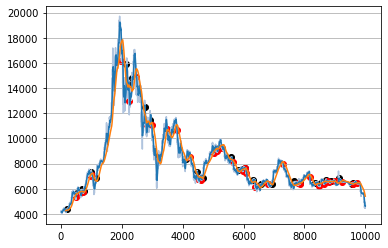

Profit: 327.3809175135801 Count: 74


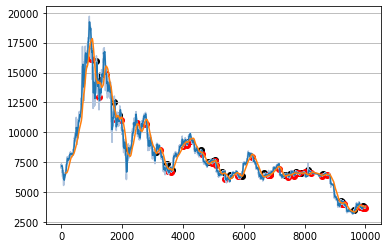

Profit: 48.01363614725637 Count: 73


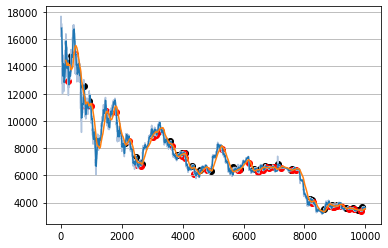

Profit: 43.02774604056731 Count: 82


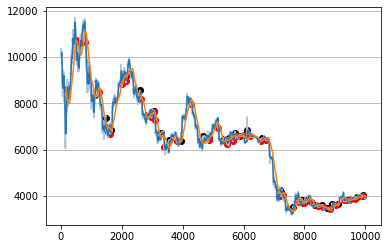

Profit: 62.257062734061584 Count: 84


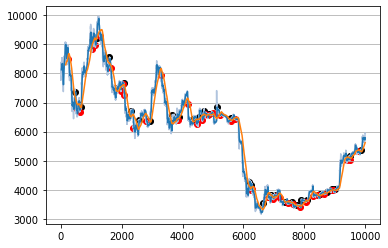

Profit: 34.119424999169766 Count: 86


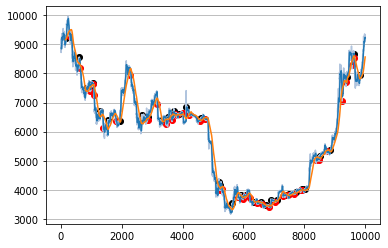

Profit: 45.233773339937194 Count: 87


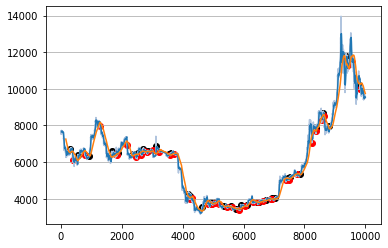

Profit: 72.10819199685166 Count: 84


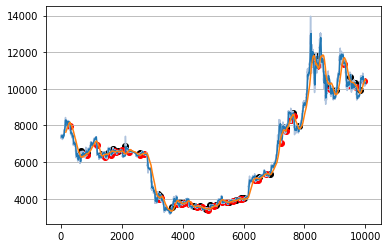

Profit: 77.33251814531712 Count: 87


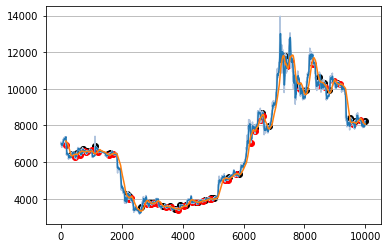

Profit: 69.74236989794757 Count: 88


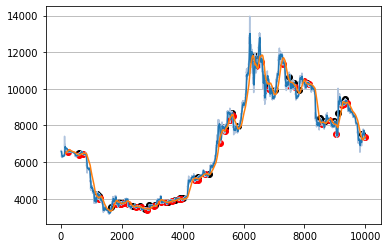

Profit: 81.02473631172359 Count: 85


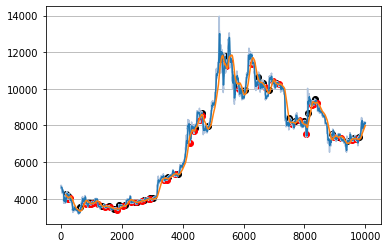

Profit: 46.2404321220715 Count: 87


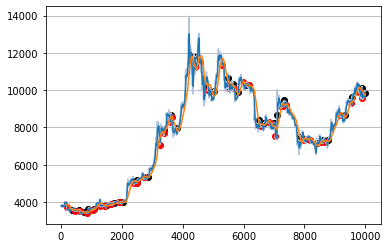

Profit: 70.76825448732265 Count: 82


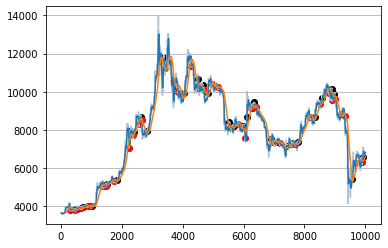

Profit: 186.99650689353106 Count: 80


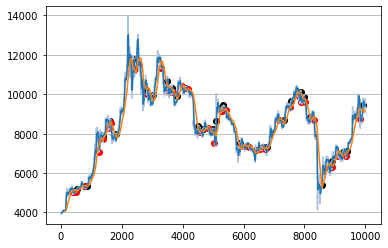

Profit: 158.69029033437982 Count: 76


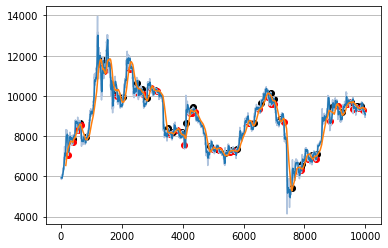

Profit: 96.31548531235818 Count: 81


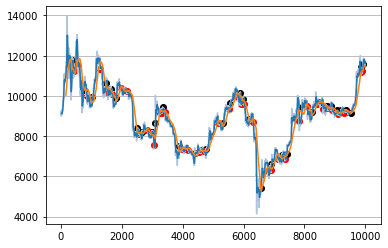

Profit: 57.39083779090165 Count: 84


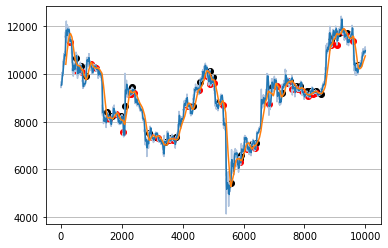

Profit: 46.2215601034216 Count: 84


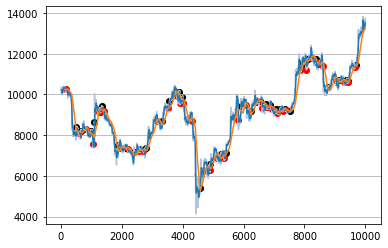

Profit: 66.72296540247275 Count: 84


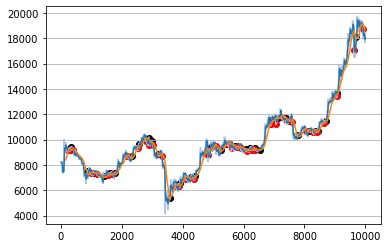

Profit: 110.2594596051402 Count: 81


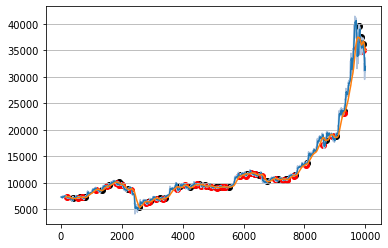

Profit: 154.801458105519 Count: 83


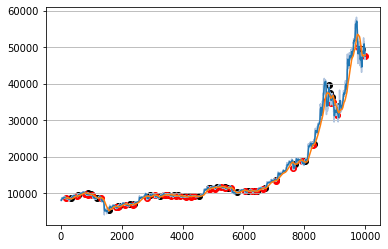

Profit: 173.4560430867107 Count: 83


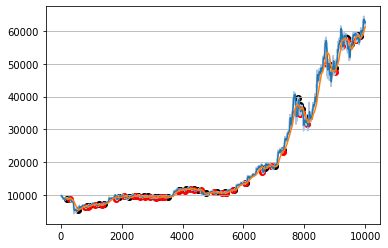

Profit: 185.514337536535 Count: 85


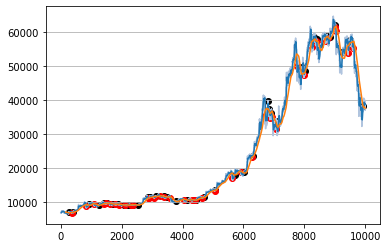

Profit: 129.40393950517395 Count: 87


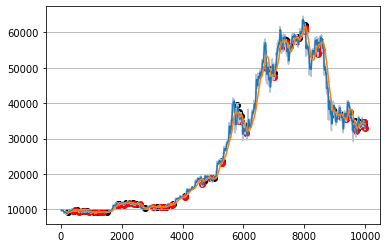

Profit: 62.56967287920814 Count: 98


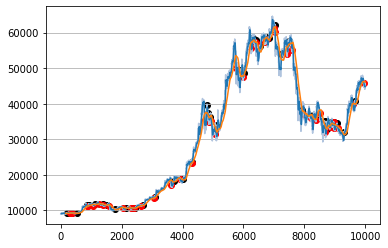

Profit: 131.3628268670557 Count: 92


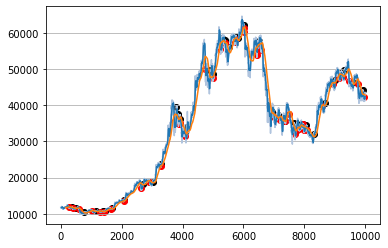

Profit: 84.64547963378807 Count: 89


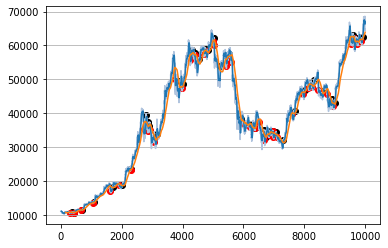

Profit: 112.36615885207848 Count: 92


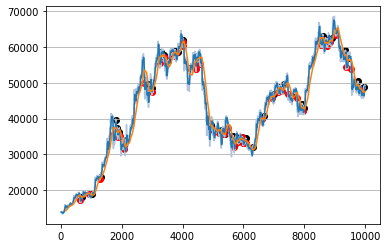

Profit: 22.827048459460116 Count: 94


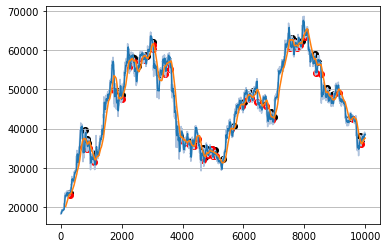

Profit: 20.668550741854048 Count: 96


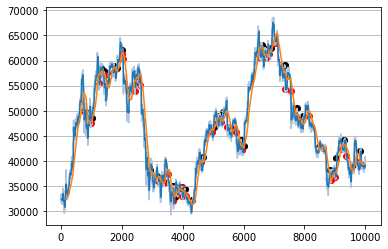

Profit: -33.748094652710996 Count: 93


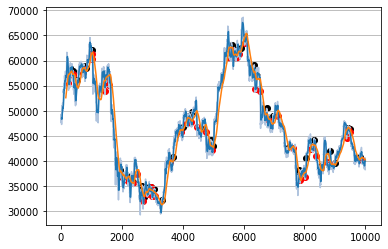

Profit: -26.80171719997368 Count: 97


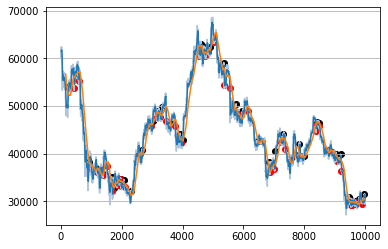

Profit: -54.357764071277025 Count: 103


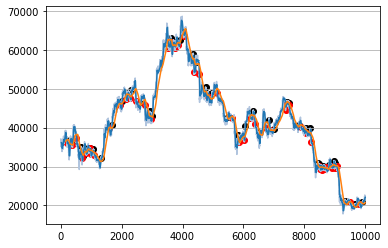

Profit: -45.29223667674586 Count: 102


In [11]:
# SMA strategy -- best Sharpe Ratio
sma_parameters_S = {
    "name":"SMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.1,                                     ## float
    "long_period": 162,                               ## long period of SMA curve
    "short_period": 22,                               ## short period of SMA curve
    "trading_logistic":"both",                       ## "long", "short", "both"
    "trading_unit": "all_in"                      ## "all_in", "same_unit" or "same_money"
}
sma_S = Strategies.SMA(sma_parameters_S)
profits = []
plot_window(strategy=sma_S, dataset = df, window_size = 10000, window_off = 1000, profits = profits)

In [12]:
# Grid strategy
# grid_parameters = {
#     "name":"grid",                                    ## str
#     "start_money" : 1000.0,                           ## float    
#     "start_storage" : 0.0,                            ## float
#     "trading_fee_rate" : 0.002,                       ## float
#     "unit" : 0.03501,                                   ## float
#     "grid_number" : 38,                               ## int  
#     "equal_Diff_or_Ratio" : "RATIO",                  ## "DIFF", "RATIO"
#     "trading_logistic":"both",                        ## "long", "short", "both"
#     "initial_setup":{"type":"None", "portion":0.0},   ## "type": "long", "short" or "None". "portion" : float
#     "lowest_price" : 6001.0,                             ## float
#     "highest_price" : 44000.0                         ## float
# }
# myGrid = Strategies.Grid(grid_parameters)
# profits = []
# plot_window(strategy=myGrid, dataset = df, window_size = 10000, window_off = 1000, profits = profits)